In [1]:
using Plots # mega długo się ładuje 
using LaTeXStrings
using Distributions

In [2]:
include("MBP.jl")

d_exp (generic function with 1 method)

In [3]:
N = 10 ^ 4;
epsilon = Float64.(rand(N) .< 1/2);
epsilon[epsilon .== 0] .= -1;
X = randn(N);
Y = X;
Y[abs.(X) .> 1] .= -Y[abs.(X) .> 1];
Y = Y .* epsilon;

First we check the covariance

In [4]:
cov(X, Y)

-0.00874377039819437

Then the PDFs and CDFs of X and Y separately

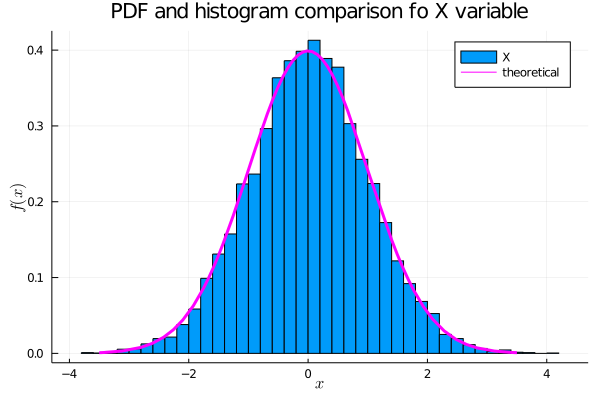

In [5]:
my_dist = Normal(0,1);
t = range(-3.5, 3.5, length=N);
histogram(X, labels = "X", normalize = true, reuse = false)
plot!(xlabel = L"x",
    ylabel = L"f(x)", title  = "PDF and histogram comparison fo X variable",
    labels = "theoretical",
    t -> pdf(my_dist, t), t[1], t[end], lw = 3, linecolor = colorant"magenta")

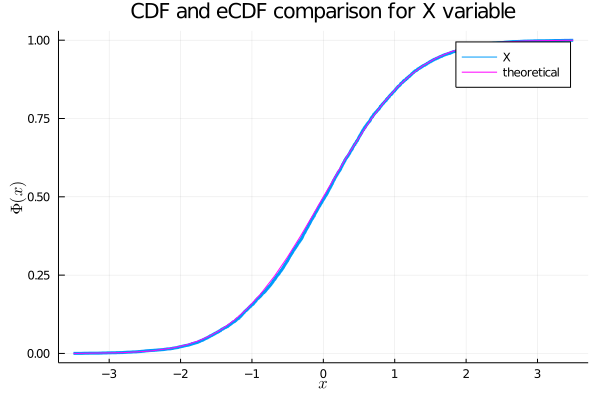

In [6]:
plot(t, CDF(t, X, N), labels = "X", lw = 3, reuse = false)

plot!(xlabel = L"x",
    ylabel = L"\Phi(x)", title  = "CDF and eCDF comparison for X variable",
    labels = "theoretical",
    t -> cdf(my_dist, t), t[1], t[end], linecolor = colorant"magenta")

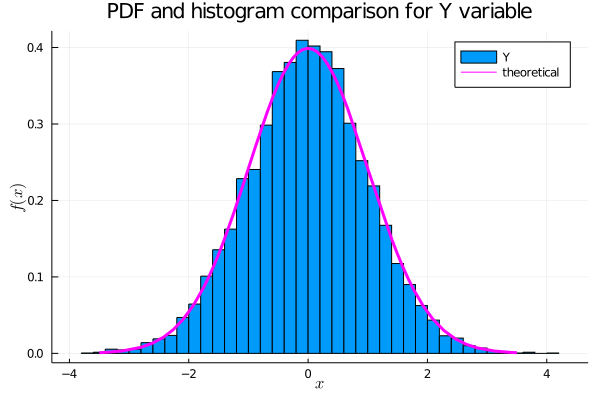

In [7]:
histogram(Y, labels = "Y", normalize = true, reuse = false)
plot!(xlabel = L"x",
    ylabel = L"f(x)", title  = "PDF and histogram comparison for Y variable",
    labels = "theoretical",
    t -> pdf(my_dist, t), t[1], t[end], lw = 3, linecolor = colorant"magenta")

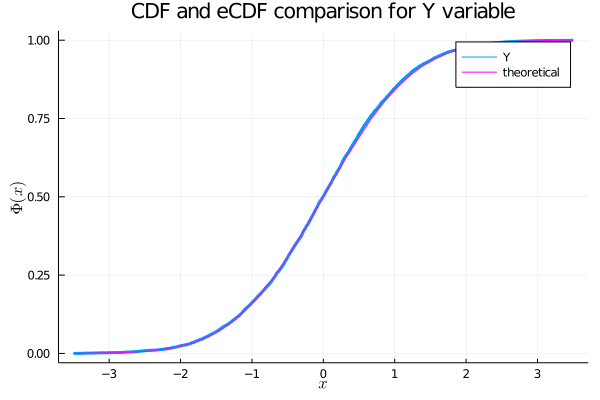

In [8]:
plot(t, CDF(t, Y, N), labels = "Y", lw = 3, reuse = false)

plot!(xlabel = L"x",
    ylabel = L"\Phi(x)", title  = "CDF and eCDF comparison for Y variable",
    labels = "theoretical",
    t -> cdf(my_dist, t), t[1], t[end], linecolor = colorant"magenta")

Eventually we analyse the PDF and CDF of X + Y

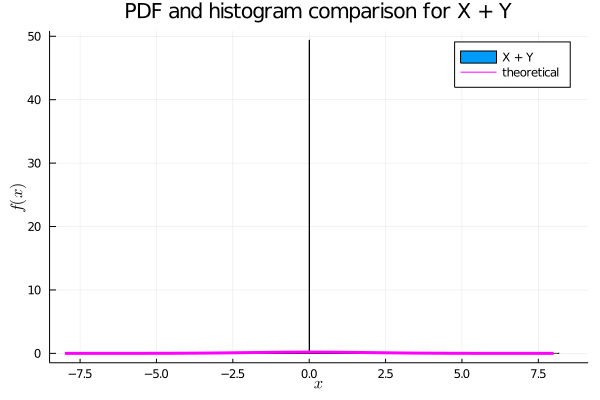

In [9]:
my_dist_of_sum = Normal(0,  2);
t_for_sum = range(-8, 8, length=N);
histogram(Y .+ X, labels = "X + Y", normalize = true, reuse = false)
plot!(xlabel = L"x",
    ylabel = L"f(x)", title  = "PDF and histogram comparison for X + Y",
    labels = "theoretical",
    t_for_sum -> pdf(my_dist_of_sum, t_for_sum), t_for_sum[1], t_for_sum[end], lw = 3, linecolor = colorant"magenta")

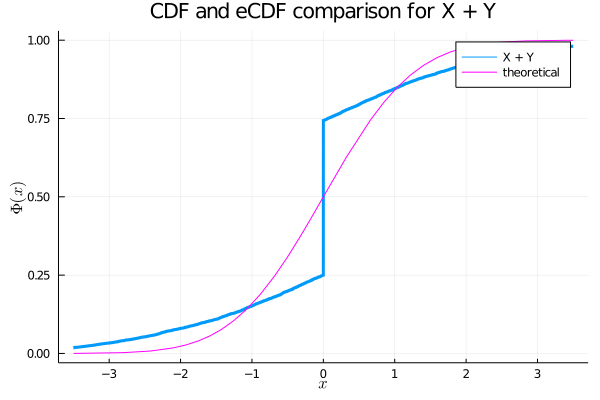

In [10]:
plot(t, CDF(t, X .+ Y, N), labels = "X + Y", lw = 3, reuse = false)

plot!(xlabel = L"x",
    ylabel = L"\Phi(x)", title  = "CDF and eCDF comparison for X + Y",
    labels = "theoretical",
    t -> cdf(my_dist, t), t[1], t[end], linecolor = colorant"magenta")